In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
from somoclu import Somoclu
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from scipy.spatial.distance import cdist


If you installed Somoclu with pip on Windows, this typically means missing DLLs. Please refer to the documentation.


In [3]:
#file = 'CW PUMP 1B CURRENT.csv'
#file = 'ID FAN 1B MTR OBRG TEMP.csv'
file = 'temperator.csv'
#file = '9-1-2008 to 9-1-2009 Trend.csv'

if (file == 'CW PUMP 1B CURRENT.csv'):
    outlierRange = []
    outlierRangeDel = []

elif (file == 'ID FAN 1B MTR OBRG TEMP.csv'):
    outlierRange = []
    outlierRangeDel = []

elif (file == 'temperator.csv'):
    outlierRange = [90, 10]
    outlierRangeDel = [100, -10]
    outlierRangePosDel = [] 
elif (file == '9-1-2008 to 9-1-2009 Trend.csv'):
    outlierRange = []
    outlierRangeDel = []


In [4]:
rowDates = []
rowValues = []
counter = 0

dataDF = pd.read_csv(file, sep=',', header=None)  

for index, row in dataDF.iterrows():
    rowValue = row[1]
    rowDate = row[0]
        
    try:
        float(rowValue)
        pd.to_datetime(rowDate)
        rowValues.append(float(rowValue))
        rowDates.append(pd.to_datetime(rowDate))                    
    except:
        counter += 1
        continue
    #if index == 2000:
        #break

print('values :',len(rowValues))
print('dates :',len(rowDates))
print('invalid :',counter)

values : 237129
dates : 237129
invalid : 8001


In [32]:
def createOutlierList(values, interval):
    counter = 0
    outlier = []
    for v in values:
        if (v > interval[0] or  v < interval[1]):
            outlier.append(1)
            counter = counter + 1
        else:
            outlier.append(0)
    print("outlier :", counter)
    return outlier

In [33]:
def calculateDelta(values, dates):
    deltaDates = dates.copy()
    del deltaDates[0]
    delta = []
    posDelta = []

    for idx in range(1, len(values)):
        x = values[idx] - values[idx - 1]
        delta.append(x)
        if(x < 0):
            posDelta.append(-1*x)
        else:
            posDelta.append(x)
            
    print("delta Values: ", len(delta))
    print("pos delta Values: ", len(posDelta))
    print("delta Dates: ", len(deltaDates))

    return delta, posDelta, deltaDates

In [34]:
def plotTheclusteredData(dates, values, labels, titel):
    fig, (ax1) = plt.subplots(1, figsize=(14,6))
    ax1.scatter(dates, values , c=labels.astype(np.float))
    ax1.set_xlabel("$Time$")
    ax1.set_ylabel("$Value$")
    ax1.set_title(titel)
    plt.show()

In [35]:
def plotTheElbow(K, distortions):
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [36]:
def plotTheDataWithoutClusters(x, predicted, rowValues, rowDates, titel):
    print("without cluster : " , x )
    counterProCluster = 0
    clusterVal = []
    clusterDate = []
    predictedNew = []

    for i in range(len(predicted)):
        if(predicted[i] != x):
            counterProCluster = counterProCluster + 1
            clusterVal.append(rowValues[i])
            clusterDate.append(rowDates[i])
            predictedNew.append(predicted[i])
        else:
            continue

    ax = plt.gca()
    ax.scatter(clusterDate, clusterVal, c = predictedNew)
    plt.title(titel)
    plt.show()

In [37]:
outlier = createOutlierList(rowValues, outlierRange)
deltaValues, posDeltaValues, deltaDates = calculateDelta(rowValues, rowDates)
outlierDelta = createOutlierList(deltaValues, outlierRangeDel)
outlierPosDelta = createOutlierList(posDeltaValues, outlierRangeDel)

outlier : 3
delta Values:  1997
pos delta Values:  1997
delta Dates:  1997
outlier : 6
outlier : 6


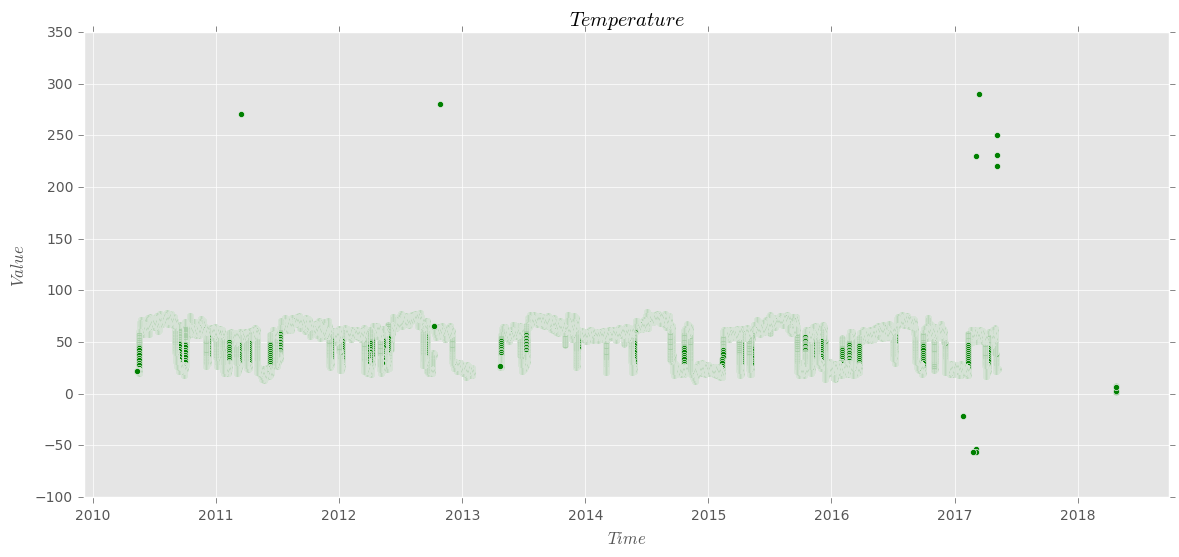

In [6]:
fig, (ax1) = plt.subplots(1, figsize=(14,6))

ax1.scatter(rowDates, rowValues, c="green")
#ax1.scatter(deltaDates, deltaValues, c="green")
#ax1.scatter(deltaDates, posDeltaValues, c="green")


ax1.set_xlabel("$Time$")
ax1.set_ylabel("$Value$")
ax1.set_title("$Temperature$")
#ax1.set_title("$K-Means original$")
plt.show()

In [39]:
c1 = np.asarray(rowValues).reshape(-1, 1)
c2 = np.asarray(rowDates)
c3 = []
colors = ["white"]
colors.extend(["green"])
colors.extend(["blue"])
colors.extend(["black"])

n_rows = len(c1)
n_columns = 1

som = somoclu.Somoclu(2,2,)
%time som.train(c1)
#som.cluster(c1)

list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []
list9 = []
ousreißer = []

for i in range(len(c1)):
    print(str(som.bmus[0]))
    if(("[0 0]") in (str(som.bmus[i]))):
        list1.append((som.bmus[i]))
    
    if(("[1 0]") in (str(som.bmus[i]))):
        list2.append((som.bmus[i]))

    if(("[2 0]") in (str(som.bmus[i]))):
        list3.append((som.bmus[i]))

    if(("[0 1]") in (str(som.bmus[i]))):
        list4.append((som.bmus[i]))

    if(("[1 1]") in (str(som.bmus[i]))):
        list5.append((som.bmus[i]))

    if(("[2 1]") in (str(som.bmus[i]))):
        list6.append((som.bmus[i]))

    if(("[0 2]") in (str(som.bmus[i]))):
        list7.append((som.bmus[i]))

    if(("[1 2]") in (str(som.bmus[i]))):
        list8.append((som.bmus[i]))

    if(("[2 2]") in (str(som.bmus[i]))):
        list9.append((som.bmus[i]))

print(len(list1)/len(c1))
print(len(list2)/len(c1))
print(len(list3)/len(c1))
print(len(list4)/len(c1))
print(len(list5)/len(c1))
print(len(list6)/len(c1))
print(len(list7)/len(c1))
print(len(list8)/len(c1))
print(len(list9)/len(c1))

print(len(list1)/len(c1)+len(list2)/len(c1)+len(list4)/len(c1)+len(list5)/len(c1))

for i in range(len(c1)):
    if (c1[i]>200):
        ousreißer.append(c2[i])

        '''for i in out:
    for j in ousreißer:
        if(i==j):
            print("true")
'''

print(type(som.umatrix))

A = np.squeeze(np.asarray(som.umatrix))

print(som.umatrix.reshape(1,-1))
colours = []

counter = 0
for i in som.umatrix.reshape(1,-1):
    counter = counter +1
    colours.append(str(counter))

print(A.reshape(1,-1))
fig, (ax1) = plt.subplots(1, figsize=(14,6))
ax1.scatter(list(Xoriginal['dates']), list(Xoriginal['values']), c = colours)
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title("$self-organizing maps Origin$")
plt.show()


NameError: name 'wrap_train' is not defined

In [ ]:
som.view_component_planes()